### 3. 상관관계 행렬, 산점도 만들어보기: 회귀(regression) 모델들로
w3_2regression.ipynb의 코드를 가져와 상관관계 행렬, 예측값/실제값값 산점도를 만들어 봄.

상관관계 행렬: 특정 속성이 다른 속성과 얼마나 관련있는지를 보여주는 행렬(표).
* 보통 0.3 이상이면 상관관계가 있다, 0.7 이상이면 아주 높다고 봄.
* 일반적으로 레이블과 다른 속성들의 상관관계만 확인한 뒤, 관계성이 낮은 속성을 지워버림(특징 선택).

예측값/실제값 산점도: 좌표평면에 AI 모델이 예측한 값과 실제 값이 어느 위치에 있는지 분포를 보여 줌
* x축에 비교하고 싶은 속성을 하나 선택. y축은 예측 or 실제 레이블 값이 됨.
* 이 분포를 보고 아웃라이어 데이터가 있는지, 어느 부분 데이터를 삭제하면 AI 성능이 높아질지 체크

In [2]:
# 결측치 확인, 결측치 제거(원래는 따로따로 해야 함)

# 결측치 확인
import pandas as pd

df = pd.read_csv("../abalone.csv")

print(df.isnull().sum()) # Rings 속성이 레이블. 나무의 나이테 갯수(= 나무 나이)
print("")
print(df.head())

# 결측치 제거: 필요 없음

# df.drop(columns=['Cabin'], inplace=True)

# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# df['Age'].fillna(df['Age'].mean(), inplace=True)

# print(df.isnull().sum())


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   M   0.440     0.365   0.125        0.5160          0.2155   
4   4   I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64


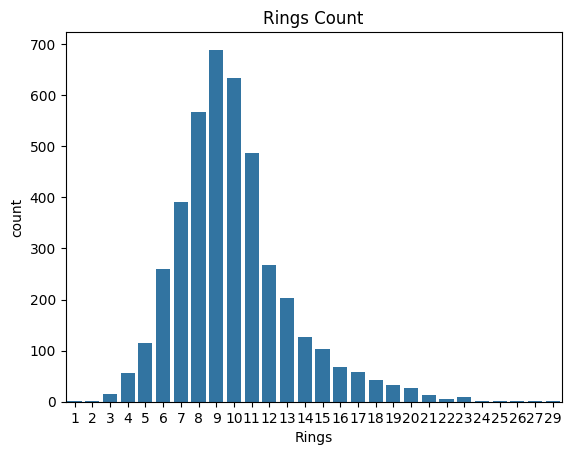

In [3]:
# 레이블 불균형(imbalanced data) 확인

print(df['Rings'].value_counts())

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Rings'])
plt.title("Rings Count")
plt.show()

In [4]:
# 인코딩(숫자가 아닌 데이터를 숫자로 변환)

# **인코딩 전: 열의 각 값의 개수 확인
print(df['Sex'].value_counts())
print("----[위: 변환 전, 아래: 변환 후]----")


# **인코딩: Label Encoding 방법 사용
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

print(df['Sex'].value_counts())
print(df.head())

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64
----[위: 변환 전, 아래: 변환 후]----
Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64
   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


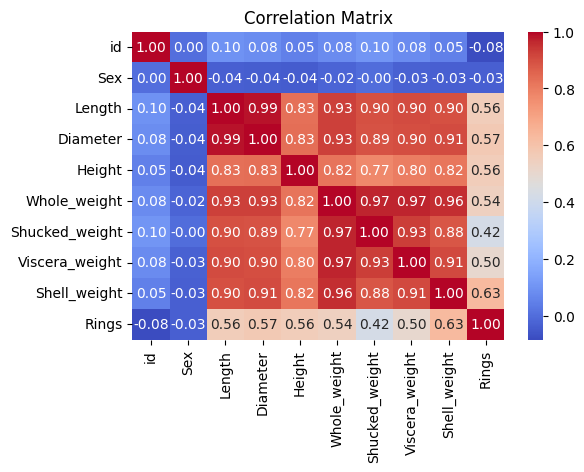

In [5]:
# **상관 관계 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
# 데이터 X_train, X_test, y_train, y_test 분할

from sklearn.model_selection import train_test_split  # 데이터 분할 함수

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율

X

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [7]:
# 만든 데이터로 4가지 모델 학습

from sklearn.metrics import mean_squared_error  # MSE 평가 함수


# [DTR 모델]
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

dtr_y_pred = dtr_model.predict(X_test)

mse = mean_squared_error(y_test, dtr_y_pred)
print(f"DTR 모델 mse: {mse:.2f}")


# [RFR 모델]
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

rfr_y_pred = rfr_model.predict(X_test)

mse = mean_squared_error(y_test, rfr_y_pred)
print(f"RFR 모델 mse: {mse:.2f}")


# [SVR 모델]
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, svr_y_pred)
print(f"SVR 모델 mse: {mse:.2f}")


# [LR 모델]
from sklearn.linear_model import LinearRegression

# 모델 생성, 학습(= 훈련)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측, 평가
lr_y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_y_pred)
print(f"LR 모델 mse: {mse:.2f}")

DTR 모델 mse: 6.31
RFR 모델 mse: 3.74
SVR 모델 mse: 10.60
LR 모델 mse: 4.96


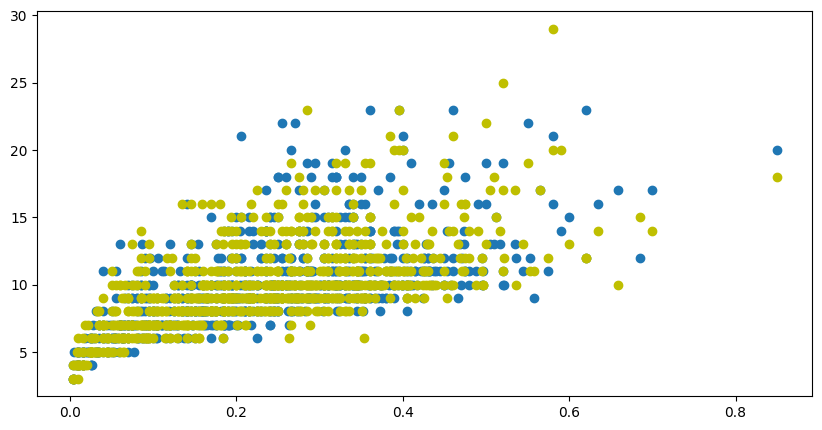

In [11]:
# 산점도 그리기

# 예측값 vs 실제값 산점도 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test') # 실제 값
    # X_test[여기]: '여기' 안에 X의 속성 중 어떤 것이든 하나 넣을 수 있다.
plt.scatter(X_test['Shell_weight'], dtr_y_pred, c='y', label='ly_preds') # 예측 값
plt.show()